## ARIMA 모델을 이용한 유튜버 미스터리튜브 성장률 예측

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [37]:
df = pd.read_csv('data/미스터리튜브_stat.csv',index_col = 'searchDate')

In [38]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,19743,52200,17,0,54
2020-02-15,23929,52300,18,0,57
2020-02-16,26015,52500,18,0,58
2020-02-17,25312,52600,18,0,58
2020-02-18,25040,52800,18,0,57
...,...,...,...,...,...
2021-02-12,63144,86300,73,94,55
2021-02-13,86230,86700,74,94,56
2021-02-14,59113,87000,74,94,57


## 컬럼 정리 (구독자 수만 남겨놓기)

In [39]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [40]:
df

,subscriberCount
searchDate,
2020-02-14,52200
2020-02-15,52300
2020-02-16,52500
2020-02-17,52600
2020-02-18,52800
...,...
2021-02-12,86300
2021-02-13,86700
2021-02-14,87000


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [41]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [42]:
train_df = df[:target_date]

In [43]:
test_df = df[target_date:]

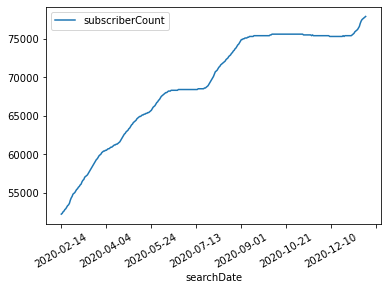

In [44]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [45]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [46]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  338
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1841.600
Method:                       css-mle   S.D. of innovations             56.131
Date:                Tue, 16 Feb 2021   AIC                           3695.200
Time:                        15:37:38   BIC                           3718.139
Sample:                             1   HQIC                          3704.342
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2226     24.619      3.259      0.001      31.970     128.475
ar.L1.D.y      0.8379      0.235      3.571      0.000       0.378       1.298
ar.L2.D.y      0.1038      0.226      0.459      0.6

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## 최종 30일 예측값 시각화

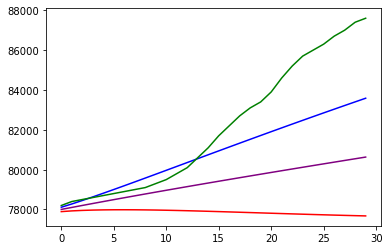

In [47]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터입니다. 
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [48]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

2716.4365879869456


In [49]:
forecast_data[0]

array([78003.26190715, 78103.30581097, 78202.5280283 , 78300.72777833,
       78397.98551114, 78494.3478004 , 78589.86202003, 78684.57269888,
       78778.52206485, 78871.75012261, 78964.29477515, 79056.19193373,
       79147.47562251, 79238.17807783, 79328.32984204, 79417.95985259,
       79507.09552634, 79595.76283945, 79683.9864031 , 79771.78953523,
       79859.19432846, 79946.22171451, 80032.89152519, 80119.22255018,
       80205.23259184, 80290.93851703, 80376.35630633, 80461.50110054,
       80546.38724489, 80631.02833078])

## 발표날까지 예측

In [50]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  368
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2056.848
Method:                       css-mle   S.D. of innovations             64.602
Date:                Tue, 16 Feb 2021   AIC                           4125.697
Time:                        15:37:39   BIC                           4149.145
Sample:                             1   HQIC                          4135.013
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.0680     38.973      2.799      0.005      32.682     185.454
ar.L1.D.y      0.5757      0.420      1.369      0.171      -0.248       1.400
ar.L2.D.y      0.3688      0.406      0.908      0.3

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


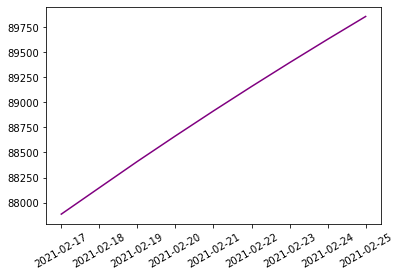

In [51]:
# 2021/02/16 데이터셋으로부터 발표날까지 9일 예측
forecast_data = model_fit.forecast(steps=9) 

pred_y = forecast_data[0].tolist() #예측 데이터입니다.

#plt.ylim([78000,88000])
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', 
            '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25'])
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프입니다.

In [52]:
forecast_data[0].astype(int)

array([87884, 88148, 88410, 88665, 88914, 89157, 89395, 89628, 89856])